# Import important libraries

In [259]:
import numpy as np
import pandas as pd

import datetime

import matplotlib as plt
import seaborn as sns

## EDA

In [260]:
ds = pd.read_csv('Equity Data (1 Jan 2020).csv')

In [261]:
ds.head()

,DATE1,SYMBOL,PREV_CLOSE,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,LAST_PRICE,CLOSE_PRICE,AVG_PRICE,TTL_TRD_QNTY,TURNOVER_LACS,NO_OF_TRADES,DELIV_QTY,DELIV_PER
0,11-02-2022,NETFLTGILT,22.40,22.02,22.48,22.02,22.25,22.27,22.25,16697,3.72,83,12968.0,77.67
1,11-02-2022,NETFMID150,116.02,119.50,119.50,113.61,114.10,113.95,114.68,224822,257.82,1780,200777.0,89.30
2,11-02-2022,NETFNIF100,183.49,178.50,184.98,178.50,182.05,182.22,182.07,2354,4.29,135,2140.0,90.91
3,11-02-2022,NETFDIVOPP,45.63,46.25,46.25,45.07,45.33,45.09,45.40,1239,0.56,86,1122.0,90.56
4,11-02-2022,NETFGILT5Y,49.66,49.66,49.82,49.47,49.82,49.79,49.72,82821,41.18,322,74512.0,89.97


In [262]:
ds.describe()

,PREV_CLOSE,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,LAST_PRICE,CLOSE_PRICE,AVG_PRICE,TTL_TRD_QNTY,TURNOVER_LACS,NO_OF_TRADES,DELIV_QTY,DELIV_PER
count,809339.000000,809339.000000,809339.000000,809339.000000,809339.000000,809339.000000,809339.000000,8.093390e+05,8.093390e+05,8.093390e+05,8.093360e+05,809336.000000
mean,668.820979,670.839406,682.637098,658.268809,669.363227,669.326862,670.396131,1.862044e+06,3.986382e+03,1.273804e+04,6.385195e+05,55.979340
std,2721.045148,2727.110313,2764.114183,2686.341895,2721.562123,2721.971042,2724.541708,1.778833e+07,1.913021e+04,3.770547e+04,4.837947e+06,20.198535
min,0.050000,0.050000,0.100000,0.050000,0.050000,0.050000,0.000000,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000
25%,44.200000,44.550000,45.700000,43.150000,44.300000,44.300000,44.420000,1.891600e+04,1.812000e+01,3.730000e+02,1.129200e+04,41.960000
50%,146.600000,147.450000,150.950000,143.500000,146.850000,146.750000,147.220000,9.747100e+04,1.562100e+02,2.018000e+03,5.190700e+04,55.710000
75%,478.650000,480.400000,491.000000,470.000000,479.000000,479.200000,480.400000,5.402470e+05,1.094525e+03,8.835000e+03,2.458908e+05,69.280000
max,96973.850000,96770.000000,98599.950000,92750.000000,97688.000000,96973.850000,94963.570000,6.161122e+09,3.564334e+06,2.428917e+06,7.870864e+08,100.000000


In [263]:
ds.dtypes

 DATE1             object
SYMBOL             object
 PREV_CLOSE       float64
 OPEN_PRICE       float64
 HIGH_PRICE       float64
 LOW_PRICE        float64
 LAST_PRICE       float64
 CLOSE_PRICE      float64
 AVG_PRICE        float64
 TTL_TRD_QNTY       int64
 TURNOVER_LACS    float64
 NO_OF_TRADES       int64
 DELIV_QTY        float64
 DELIV_PER        float64
dtype: object

In [264]:
ds.shape

(809339, 14)

In [265]:
ds.isnull().sum()

 DATE1            0
SYMBOL            0
 PREV_CLOSE       0
 OPEN_PRICE       0
 HIGH_PRICE       0
 LOW_PRICE        0
 LAST_PRICE       0
 CLOSE_PRICE      0
 AVG_PRICE        0
 TTL_TRD_QNTY     0
 TURNOVER_LACS    0
 NO_OF_TRADES     0
 DELIV_QTY        3
 DELIV_PER        3
dtype: int64

In [266]:
ds.dropna(inplace=True, axis=0)

In [267]:
ds.columns

Index([' DATE1', 'SYMBOL', ' PREV_CLOSE', ' OPEN_PRICE', ' HIGH_PRICE',
       ' LOW_PRICE', ' LAST_PRICE', ' CLOSE_PRICE', ' AVG_PRICE',
       ' TTL_TRD_QNTY', ' TURNOVER_LACS', ' NO_OF_TRADES', ' DELIV_QTY',
       ' DELIV_PER'],
      dtype='object')

In [268]:
#convert to date time
ds[' DATE1'] = pd.to_datetime(ds[' DATE1'])

In [269]:
ds[' DATE1'].max()

Timestamp('2022-12-01 00:00:00')

In [270]:
ds[' DATE1'].min()

Timestamp('2020-01-01 00:00:00')

In [271]:
ds.index = ds[' DATE1']

<AxesSubplot:xlabel=' DATE1'>

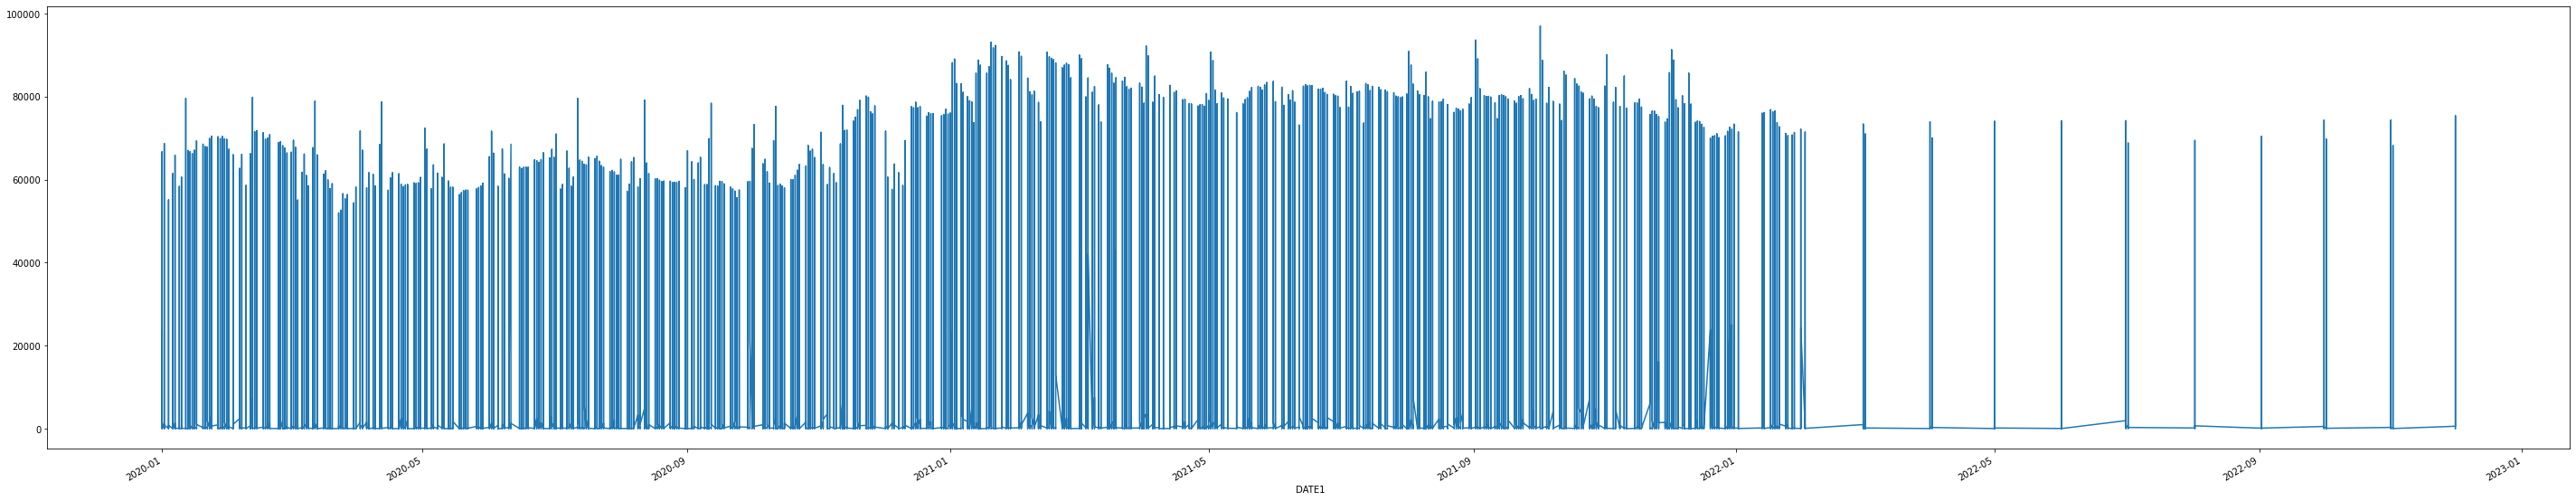

In [272]:
ds[' CLOSE_PRICE'].plot(figsize = (50,10))
#plt.show()

In [273]:
month_dictionary = {1:'JAN', 2:'FEB', 3:'MAR', 4:'APR', 5:'MAY', 6:'JUN',
                    7:'JUL', 8:'AUG', 9:'SEP', 10:'OCT',11:'NOV',12:'DEC'}

In [274]:
#create new column with month and year to groupby
ds['MNTH_YEAR'] = ds[' DATE1'].apply(lambda x: str(x.month) + '-' + str(x.year))

In [275]:
ds.head()

,DATE1,SYMBOL,PREV_CLOSE,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,LAST_PRICE,CLOSE_PRICE,AVG_PRICE,TTL_TRD_QNTY,TURNOVER_LACS,NO_OF_TRADES,DELIV_QTY,DELIV_PER,MNTH_YEAR
DATE1,,,,,,,,,,,,,,,
2022-11-02,2022-11-02,NETFLTGILT,22.40,22.02,22.48,22.02,22.25,22.27,22.25,16697,3.72,83,12968.0,77.67,11-2022
2022-11-02,2022-11-02,NETFMID150,116.02,119.50,119.50,113.61,114.10,113.95,114.68,224822,257.82,1780,200777.0,89.30,11-2022
2022-11-02,2022-11-02,NETFNIF100,183.49,178.50,184.98,178.50,182.05,182.22,182.07,2354,4.29,135,2140.0,90.91,11-2022
2022-11-02,2022-11-02,NETFDIVOPP,45.63,46.25,46.25,45.07,45.33,45.09,45.40,1239,0.56,86,1122.0,90.56,11-2022
2022-11-02,2022-11-02,NETFGILT5Y,49.66,49.66,49.82,49.47,49.82,49.79,49.72,82821,41.18,322,74512.0,89.97,11-2022


In [276]:
#calculate day-to-day percentage change
ds['CLOSE_PRECENTAGE_DELTA'] = (ds[' CLOSE_PRICE'] - ds[' PREV_CLOSE'])/ds[' CLOSE_PRICE']*100

In [277]:
ds['CLOSE_PRECENTAGE_DELTA'].max()

59.69309462915601

In [278]:
ds['CLOSE_PRECENTAGE_DELTA'].min()

-10048.325358851675

In [279]:
#group by month and stock symbol
df_grp_mnth = ds.groupby(['MNTH_YEAR','SYMBOL']).mean()

In [280]:
df_grp_mnth = df_grp_mnth.sort_values(by=['MNTH_YEAR','CLOSE_PRECENTAGE_DELTA'])

In [281]:
df_grp_mnth.head(30)

PREV_CLOSE   OPEN_PRICE   HIGH_PRICE    LOW_PRICE  \
MNTH_YEAR SYMBOL                                                           
1-2020    GAYAHWS        0.400000     0.366667     0.383333     0.350000   
          KAUSHALYA      0.900000     0.900000     0.925000     0.850000   
          SPCENET        0.900000     0.950000     0.950000     0.850000   
          RUCHI       1371.550000  1303.000000  1303.000000  1303.000000   
          AARON         61.550000    58.500000    58.500000    58.500000   
          SHYAMTEL       6.500000     6.500000     6.500000     6.200000   
          DPABHUSHAN    88.400000    88.950000    89.950000    82.400000   
          INFOMEDIA      2.550000     2.450000     2.450000     2.450000   
          SANGINITA     70.841667    70.858333    72.741667    66.000000   
          AGROPHOS      30.886957    29.406522    29.445652    29.206522   
          SIS          567.097826   547.013043   560.954348   535.558696   
          SRPL          32.700000    32.400000    33.050000    30.925000   
          EASTSILK       1.100000     1.100000     1.133333     1.050000   
          PROSEED        0.325000     0.300000     0.350000     0.275000   
          GISOLUTION     2.850000     2.800000     2.800000     2.750000   
          TFL            2.900000     2.900000     2.900000     2.800000   
          GAEL         150.426087   147.028261   151.456522   142.632609   
          BCP            7.514286     7.535714     7.621429     7.192857   
          RHFL           1.965000     1.925000     1.947500     1.900000   
          DQE            1.382500     1.352500     1.365000     1.332500   
          PRAKASHSTL     0.733333     0.716667     0.733333     0.683333   
          TALWALKARS     3.229412     3.167647     3.247059     3.091176   
          TALWGYM        2.755882     2.738235     2.802941     2.647059   
          SICAL         12.991304    13.021739    13.254348    12.508696   
          AUSOMENT      37.825000    37.475000    38.600000    35.700000   
          WEIZFOREX    390.067647   387.926471   397.129412   374.408824   
          SDBL          52.712500    51.387500    53.050000    51.100000   
          NKIND         20.614286    20.211905    20.750000    19.840476   
          SURANASOL      7.916667     7.883333     8.266667     7.444444   
          ZICOM          1.625000     1.600000     1.650000     1.550000   

                       LAST_PRICE   CLOSE_PRICE    AVG_PRICE   TTL_TRD_QNTY  \
MNTH_YEAR SYMBOL                                                              
1-2020    GAYAHWS        0.366667      0.366667     0.366667   2.532877e+05   
          KAUSHALYA      0.850000      0.850000     0.875000   3.107800e+04   
          SPCENET        0.850000      0.850000     0.950000   1.015600e+04   
          RUCHI       1303.000000   1303.000000  1303.000000   9.836000e+03   
          AARON         58.500000     58.500000    58.500000   7.297000e+03   
          SHYAMTEL       6.200000      6.200000     6.210000   1.880000e+02   
          DPABHUSHAN    85.000000     84.500000    86.990000   8.042000e+03   
          INFOMEDIA      2.450000      2.450000     2.450000   1.560000e+02   
          SANGINITA     67.858333     68.100000    69.215000   2.803733e+04   
          AGROPHOS      29.330435     29.354348    29.352174   3.146200e+04   
          SIS          548.069565    547.813043   549.616957   7.192861e+04   
          SRPL          30.975000     31.475000    31.885000   1.045150e+04   
          EASTSILK       1.066667      1.066667     1.090000   3.733567e+04   
          PROSEED        0.325000      0.325000     0.300000   1.358950e+05   
          GISOLUTION     2.750000      2.750000     2.770000   1.217000e+03   
          TFL            2.800000      2.800000     2.820000   1.609000e+03   
          GAEL         146.808696    146.602174   147.051304   9.411683e+04   
          BCP            7.250000      7.264286     7.361429   2.712684e+05   
          

## Top Performers

![image](Images/Trend_analysis.png)

In [282]:
#filter top performers
top_performers = df_grp_mnth[df_grp_mnth['CLOSE_PRECENTAGE_DELTA'] > 7]

In [283]:
#filter top non-performers
top_non_performers = df_grp_mnth[df_grp_mnth['CLOSE_PRECENTAGE_DELTA'] < -7]

In [284]:
top_performers

PREV_CLOSE   OPEN_PRICE   HIGH_PRICE   LOW_PRICE  \
MNTH_YEAR SYMBOL                                                          
1-2020    KSK                0.35        0.350     0.383333    0.333333   
          JSWISPL           18.25       18.800    20.050000   18.300000   
          PRADIP             0.35        0.400     0.400000    0.400000   
          SUBEXLTD          22.75       23.500    27.300000   23.500000   
          CHEMCON          379.15      576.375   576.500000  501.000000   
...                           ...          ...          ...         ...   
9-2022    JAGRAN            69.15       75.500    80.700000   72.200000   
          DEEPINDS         183.15      183.350   218.900000  183.350000   
          WEIZMANIND        66.60       65.050    79.900000   63.150000   
          UGARSUGAR         44.40       45.100    53.250000   44.250000   
          AWL              268.25      273.650   321.900000  272.000000   

                       LAST_PRICE   CLOSE_PRICE   AVG_PRICE   TTL_TRD_QNTY  \
MNTH_YEAR SYMBOL                                                             
1-2020    KSK            0.383333      0.383333    0.356667   1.497504e+06   
          JSWISPL       20.050000     20.050000   19.960000   3.292752e+06   
          PRADIP         0.400000      0.400000    0.400000   1.545300e+04   
          SUBEXLTD      27.300000     27.300000   26.140000   2.901395e+07   
          CHEMCON      501.400000    501.575000  525.735000   7.954308e+06   
...                           ...           ...         ...            ...   
9-2022    JAGRAN        80.450000     79.550000   77.620000   5.621888e+06   
          DEEPINDS     215.750000    214.950000  208.750000   1.390940e+06   
          WEIZMANIND    79.900000     78.950000   73.510000   4.486250e+05   
          UGARSUGAR     53.250000     53.250000   50.200000   6.994565e+06   
          AWL          321.900000    321.900000  302.030000   7.065501e+07   

                       TURNOVER_LACS   NO_OF_TRADES     DELIV_QTY   DELIV_PER  \
MNTH_YEAR SYMBOL                                                                
1-2020    KSK               5.623333          399.0  1.062840e+06      71.930   
          JSWISPL         657.280000         1942.0  2.881242e+06      87.500   
          PRADIP            0.060000           16.0  1.545300e+04     100.000   
          SUBEXLTD       7585.590000        35320.0  1.534424e+07      52.890   
          CHEMCON       50156.640000       297490.0  2.676576e+06      42.925   
...                              ...            ...           ...         ...   
9-2022    JAGRAN         4363.530000        39123.0  1.492350e+06      26.550   
          DEEPINDS       2903.640000        51832.0  3.178880e+05      22.850   
          WEIZMANIND      329.790000         1327.0  7.193100e+04      16.030   
          UGARSUGAR      3511.160000        26860.0  3.203371e+06      45.800   
          AWL          213398.000000       679615.0  1.708664e+07      24.180   

                      CLOSE_PRECENTAGE_DELTA  
MNTH_YEAR SYMBOL                              
1-2020    KSK                       8.333333  
          JSWISPL                   8.977556  
          PRADIP                   12.500000  
          SUBEXLTD                 16.666667  
          CHEMCON                  20.936208  
...                                      ...  
9-2022    JAGRAN                   13.073539  
          DEEPINDS                 14.794138  
          WEIZMANIND               15.642812  
          UGARSUGAR                16.619718  
          AWL                      16.666667  

[492 rows x 13 columns]

In [285]:
def tupleListToDictionary(tuple_list):
    dictionary = {}
    for mnth, symbol in tuple_list:
        dictionary.setdefault(mnth, []).append(symbol)
    return dictionary

In [286]:
top_performer_dict = tupleListToDictionary(list(top_performers.index))

In [287]:
top_non_performer_dict = tupleListToDictionary(list(top_non_performers.index))

In [288]:
#list of top performers
for year in [2020,2021,2022]:
    for month in range(1,13):
        month_name = month_dictionary[int(month)]
        key = str(month)+'-'+str(year)
        print('Top performers of ',month_name,' ',year)
        print('=============================')
        if key in top_performer_dict.keys():
            print(top_performer_dict[key])


Top performers of  JAN   2020
['KSK', 'JSWISPL', 'PRADIP', 'SUBEXLTD', 'CHEMCON']
Top performers of  FEB   2020
['MIC', 'PROSEED', 'STAMPEDE', 'HEMIPROP', 'SUBEXLTD']
Top performers of  MAR   2020
['CHROMATIC']
Top performers of  APR   2020
['SELMCL', 'NTL', 'SUBEXLTD', 'ZENITHBIR', 'UVSL', 'PROSEED', 'BOROSIL']
Top performers of  MAY   2020
['NOVARTIND', 'VALIANTORG', 'KAUSHALYA', 'STAMPEDE', 'VIVIDHA']
Top performers of  JUN   2020
['ZENITHBIR', 'DHANI', 'HEMIPROP', 'DPABHUSHAN', 'ANKITMETAL', 'EUROMULTI', 'IMPEXFERRO', 'AARON', 'KSERASERA']
Top performers of  JUL   2020
['ANKITMETAL', 'RCOM', 'GLAND', 'KHAICHEM', 'NTL', 'LSIL', 'DCMFINSERV', 'GAMMNINFRA', 'MIC', 'PRADIP', 'PRAKASHSTL', 'SCAPDVR', 'VIVIDHA']
Top performers of  AUG   2020
['MIC', 'RANASUG', 'DCMFINSERV', 'WEIZFOREX', 'PRADIP', 'CCCL', 'KAUSHALYA', 'CASTEXTECH', 'CKFSL', 'GAYAHWS']
Top performers of  SEP   2020
['DCMFINSERV', 'RMCL', 'GAYAHWS', 'WEIZFOREX', 'SCAPDVR']
Top performers of  OCT   2020
['RMCL', 'CCCL']
Top 

In [289]:
#list of top non performers
for year in [2020,2021,2022]:
    for month in range(1,13):
        month_name = month_dictionary[int(month)]
        key = str(month)+'-'+str(year)
        print('Top performers of ',month_name,' ',year)
        print('=============================')
        if key in top_non_performer_dict.keys():
            print(top_non_performer_dict[key])

Top performers of  JAN   2020
['GAYAHWS', 'KAUSHALYA']
Top performers of  FEB   2020
['UVSL']
Top performers of  MAR   2020
['EBANK', 'IRCON', 'SUBEXLTD', 'UVSL', 'PROSEED']
Top performers of  APR   2020
['CASTEXTECH', 'KHAICHEM']
Top performers of  MAY   2020
['KSERASERA', 'GAYAHWS', 'ANKITMETAL', 'NTL', 'PRADIP', 'SCAPDVR', 'HEMIPROP', 'SELMCL']
Top performers of  JUN   2020
['VIVIDHA', 'NTL', 'PRADIP', 'STAMPEDE', 'CORPBANK', 'SELMCL', 'ALBK', 'UNITEDBNK', 'SITINET', 'YESBANK']
Top performers of  JUL   2020
['AXISGOLD', 'GLOBAL', 'KUANTUM', 'AXISNIFTY', 'CKFSL']
Top performers of  AUG   2020
['EICHERMOT', 'SHRENIK', 'IMPEXFERRO']
Top performers of  SEP   2020
['KSERASERA', 'LAURUSLABS', 'AARTIDRUGS', 'SELMCL', 'ALBK', 'SUBEXLTD', 'CORPBANK']
Top performers of  OCT   2020
['PROSEED', 'STAMPEDE', 'UVSL', 'MAHESHWARI']
Top performers of  NOV   2020
Top performers of  DEC   2020
['MAJESCO', 'UVSL', 'APLAPOLLO', 'CKFSL', 'SELMCL', 'SYNDIBANK', 'ALBK', 'ORIENTBANK', 'UNITEDBNK', 'MIC', 'A